Parte 2: Olist

Desafio: Criar um notebook de análise exploratória (como fizemos na nossa aula de hoje) com todas as etapas de coleta, limpeza, análise e visualização com base de dados da Olist.

**Requisitos:**

Formular no mínimo **2 perguntas** (caso queira se desafiar crie pelo menos mais perguntas além das 2 obrigatórias) para responder com suas análises;
Utilizar pelo menos **3 bases de dados da Olist** (caso você deseje criar sua base do zero). Caso deseje continuar utilizando a que criamos em aula, é necessário incluir pelo menos mais **1 tabela** para enriquecer sua análise.

Para responder as perguntas elaboradas usar:

Criar pelo menos **2 gráficos**.
Exporte sua base final em csv.
Submeta uma pasta que contenha:
o arquivo **seu_nome.ipynb** com sua análise exploratória;
a base final criada por você no formato .csv;

In [79]:
# Formular no mínimo **2 perguntas** (caso queira se desafiar crie pelo menos mais perguntas além das 2 obrigatórias) para responder com suas análises;
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_produtos = pd.read_csv('../para-sala/dados/olist_products_dataset.csv') #mergeado
df_pedidos = pd.read_csv('../para-sala/dados/olist_orders_dataset.csv') #mergeado
df_itens_pedidos = pd.read_csv('../para-sala/dados/olist_order_items_dataset.csv') #mergeado
df_meio_pgto = pd.read_csv('../para-sala/dados/olist_order_payments_dataset.csv')
df_consumidor = pd.read_csv('../para-sala/dados/olist_customers_dataset.csv') #mergeado


In [38]:
columns_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])
df_pedidos['reference_month'] = df_pedidos['order_purchase_timestamp'].dt.strftime('%Y-%m-01')

In [39]:
df_consumidor = df_consumidor.drop('customer_unique_id', axis=1)

In [40]:
df_produtos = df_produtos[['product_id','product_category_name']]
df_produtos = df_produtos.dropna()
df_produtos = df_produtos.reset_index(drop=True)

In [41]:
df_olist_pedidos = pd.merge(df_pedidos, df_itens_pedidos, on=['order_id'], how='inner')
df_olist_produtos_pedidos = pd.merge(df_olist_pedidos, df_produtos, on=['product_id'], how='inner')
df_olist_meio_pgto = pd.merge(df_meio_pgto, df_olist_produtos_pedidos, on=['order_id'], how='inner')
df_olist = pd.merge(df_olist_meio_pgto, df_consumidor, on=['customer_id'], how='inner')
df_olist

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,reference_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-05-09 17:36:51,2018-04-01,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-29 20:32:09,2018-06-01,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-18 17:24:41,2017-12-01,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-21 01:35:51,2017-12-01,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,cama_mesa_banho,36060,juiz de fora,MG
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,15fd6fb8f8312dbb4674e4518d6fa3b3,delivered,2018-05-21 13:59:17,2018-06-01 21:44:53,2018-05-01,1,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,cama_mesa_banho,18570,conchas,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115898,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-16 13:09:51,2018-03-01,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31,construcao_ferramentas_iluminacao,12954,atibaia,SP
115899,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-23 22:25:56,2017-08-01,1,fb55982be901439613a95940feefd9ee,3d871de0142ce09b7081e2b9d1733cb1,2017-08-24 10:04:56,79.00,17.80,papelaria,30210,belo horizonte,MG
115900,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77,e4abb5057ec8cfda9759c0dc415a8188,invoiced,2017-11-18 17:27:14,NaT,2017-11-01,1,848ef0a103ee21407d1fbd0f7e7ae179,3d621842b2ed28e2b474132480edac3c,2017-11-27 17:46:05,39.99,7.78,automotivo,1519,sao paulo,SP
115901,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-21 22:41:46,2018-08-01,1,e9c1abcc7126360336d8f56d49041a8c,679769a98cfcc6da877c8486ff1c13f3,2018-08-13 23:45:00,349.00,20.54,beleza_saude,22733,rio de janeiro,RJ


In [42]:
df_olist['order_purchase_timestamp'] = pd.to_datetime(df_olist['order_purchase_timestamp'])
df_olist['order_delivered_customer_date'] = pd.to_datetime(df_olist['order_delivered_customer_date'])
df_olist['order_delivered_date'] = df_olist['order_delivered_customer_date'].dt.date
df_olist['shipping_limit_dt'] = pd.to_datetime(df_olist['shipping_limit_date']).dt.date
df_olist.loc[df_olist['order_delivered_date'] > df_olist['shipping_limit_dt'], 'status_entrega'] = 'ATRASADO'
df_olist.loc[df_olist['order_delivered_date'] < df_olist['shipping_limit_dt'], 'status_entrega'] = 'ADIANTADO'
df_olist.loc[df_olist['order_delivered_date'] == df_olist['shipping_limit_dt'], 'status_entrega'] = 'DENTRO DO ESPERADO'

In [43]:
df_olist = df_olist[['reference_month','order_id','product_id','product_category_name','payment_type','payment_value','price','order_status','status_entrega','customer_city','customer_state']]
df_olist = df_olist.fillna('NÃO IDENTIFICADO')
df_olist.isnull().sum()

reference_month          0
order_id                 0
product_id               0
product_category_name    0
payment_type             0
payment_value            0
price                    0
order_status             0
status_entrega           0
customer_city            0
customer_state           0
dtype: int64

In [96]:

df_olist = df_olist.sort_values(by='payment_value', ascending=True)
df_olist = df_olist.reset_index(drop=True)
df_olist

,reference_month,order_id,product_id,product_category_name,payment_type,payment_value,price,order_status,status_entrega,customer_city,customer_state
0,2017-04-01,fa65dad1b0e818e3ccc5cb0e39231352,1aecdb5fa3add74e385f25c6c527a462,ferramentas_jardim,voucher,0.00,392.55,shipped,NÃO IDENTIFICADO,cuiaba,MT
1,2017-06-01,45ed6e85398a87c253db47c2d9f48216,75d6b6963340c6063f7f4cfcccfe6a30,perfumaria,voucher,0.00,56.99,delivered,ATRASADO,goiania,GO
2,2017-05-01,b23878b3e8eb4d25a158f57d96331b18,e306ca54c91b21392317d5b4632c9fe3,consoles_games,voucher,0.00,135.30,delivered,ATRASADO,anchieta,ES
3,2017-04-01,fa65dad1b0e818e3ccc5cb0e39231352,1aecdb5fa3add74e385f25c6c527a462,ferramentas_jardim,voucher,0.00,392.55,shipped,NÃO IDENTIFICADO,cuiaba,MT
4,2018-01-01,8bcbe01d44d147f901cd3192671144db,85d4c1a46f08f730de651ea6f6645313,papelaria,voucher,0.00,59.00,delivered,ATRASADO,rio de janeiro,RJ
...,...,...,...,...,...,...,...,...,...,...,...
115340,2017-09-01,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,credit_card,13664.08,1680.00,delivered,ATRASADO,rio de janeiro,RJ
115341,2017-09-01,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,credit_card,13664.08,1680.00,delivered,ATRASADO,rio de janeiro,RJ
115342,2017-09-01,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,credit_card,13664.08,1680.00,delivered,ATRASADO,rio de janeiro,RJ
115343,2017-09-01,03caa2c082116e1d31e67e9ae3700499,5769ef0a239114ac3a854af00df129e4,telefonia_fixa,credit_card,13664.08,1680.00,delivered,ATRASADO,rio de janeiro,RJ


In [59]:
# Status dos pedidos excluindo os pedidos cancelados e indisponiveis
df_olist = df_olist.loc[df_olist['order_status'] != 'canceled']
df_olist = df_olist.loc[df_olist['order_status'] != 'unavailable']
df_olist["order_status"].value_counts(normalize=True)

delivered     0.983198
shipped       0.010525
processing    0.003138
invoiced      0.003112
approved      0.000026
Name: order_status, dtype: float64

In [60]:
df_olist.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
reference_month,115345,24,2017-11-01,8845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,115345,96823,895ab968e7bb0d5659d16cd74cd1650c,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,115345,32129,aca2eb7d00ea1a7b8ebd4e68314663af,536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,115345,73,cama_mesa_banho,11805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_type,115345,4,credit_card,85103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_value,115345.0,NaN,NaN,NaN,172.565388,266.581625,0.0,61.01,108.2,189.56,13664.08
price,115345.0,NaN,NaN,NaN,120.647086,183.116732,0.85,39.9,74.9,134.9,6735.0
order_status,115345,5,delivered,113407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
status_entrega,115345,4,ATRASADO,82601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,115345,4094,sao paulo,18137,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# 1 - Quais categorias dos produtos que mais são vendidas?
df_olist["product_category_name"].value_counts()

cama_mesa_banho                                  11805
beleza_saude                                      9932
esporte_lazer                                     8893
moveis_decoracao                                  8707
informatica_acessorios                            8036
                                                 ...  
portateis_cozinha_e_preparadores_de_alimentos       14
cds_dvds_musicais                                   14
pc_gamer                                             9
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: product_category_name, Length: 73, dtype: int64

In [86]:
# 1 - Quais categorias dos produtos que mais são vendidas?
df_olist["product_category_name"].value_counts(normalize=True)

cama_mesa_banho                                  0.102345
beleza_saude                                     0.086107
esporte_lazer                                    0.077099
moveis_decoracao                                 0.075487
informatica_acessorios                           0.069669
                                                   ...   
cds_dvds_musicais                                0.000121
portateis_cozinha_e_preparadores_de_alimentos    0.000121
pc_gamer                                         0.000078
fashion_roupa_infanto_juvenil                    0.000069
seguros_e_servicos                               0.000017
Name: product_category_name, Length: 73, dtype: float64

In [121]:
df_olist["customer_state"].value_counts()

SP    48552
RJ    15021
MG    13395
RS     6362
PR     5859
SC     4223
BA     3960
DF     2431
GO     2365
ES     2311
PE     1860
CE     1529
MT     1112
PA     1095
MS      833
MA      829
PB      627
RN      563
PI      562
AL      454
SE      395
TO      333
RO      279
AM      169
AC       93
AP       84
RR       49
Name: customer_state, dtype: int64

In [120]:
# 2 - Quais os estados com mais clientes?
df_olist["customer_state"].value_counts(normalize=True)

SP    0.420929
RJ    0.130227
MG    0.116130
RS    0.055156
PR    0.050795
SC    0.036612
BA    0.034332
DF    0.021076
GO    0.020504
ES    0.020036
PE    0.016126
CE    0.013256
MT    0.009641
PA    0.009493
MS    0.007222
MA    0.007187
PB    0.005436
RN    0.004881
PI    0.004872
AL    0.003936
SE    0.003425
TO    0.002887
RO    0.002419
AM    0.001465
AC    0.000806
AP    0.000728
RR    0.000425
Name: customer_state, dtype: float64

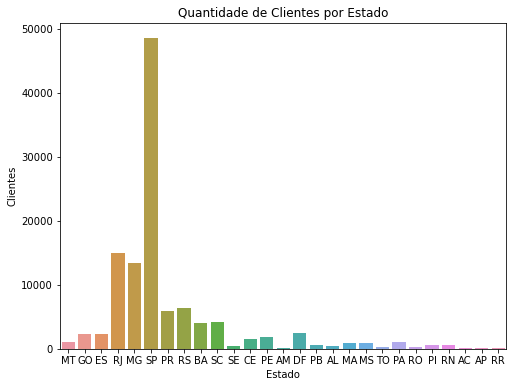

In [111]:
# 2 - Quais os estados com mais clientes?

# definir tamanho da figura
plt.figure(figsize=(8, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como o customer_state
sns.countplot(data = df_olist,
              x = 'customer_state')

# definir texto do título e eixos x e y
plt.title('Quantidade de Clientes por Estado')
plt.xlabel('Estado')
plt.ylabel('Qtd Clientes')
plt.show()

In [77]:
# 3 - Qual o meio de pagamento mais utilizado?
df_olist["payment_type"].value_counts()

credit_card    85103
boleto         22457
voucher         6129
debit_card      1656
Name: payment_type, dtype: int64

In [78]:
# 3 - Qual o meio de pagamento mais utilizado?
df_olist["payment_type"].value_counts(normalize=True)

credit_card    0.737813
boleto         0.194694
voucher        0.053136
debit_card     0.014357
Name: payment_type, dtype: float64

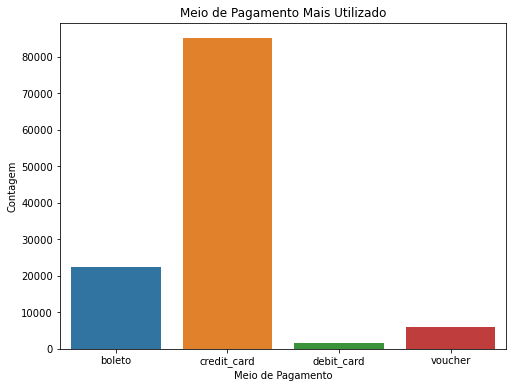

In [94]:
# 3 - Qual o meio de pagamento mais utilizado?

# definir tamanho da figura
plt.figure(figsize=(8, 6))

# instanciar o tipo de plotagem, no caso, um countplot usando x como os payment_type
sns.countplot(data = df_olist,
              x = 'payment_type')

# definir texto do título e eixos x e y
plt.title('Meio de Pagamento Mais Utilizado')
plt.xlabel('Meio de Pagamento')
plt.ylabel('Contagem')
plt.show()

In [123]:
df_olist = df_olist[['reference_month','product_category_name','payment_type','payment_value','price','order_status','status_entrega','customer_city','customer_state']]

In [127]:
df_olist.to_csv('../para-sala/dados/base_final_s14_olist_jamile.csv', index=False)